
## **Cleaning Data**

* Import data into `pandas`, and use simple functions to diagnose problems in our data.
* Visualize missing and out of range data using `missingno` and `seaborn`.
* Apply a range of data cleaning tasks that will ensure the delivery of accurate insights.

## **The Dataset**

The dataset to be used in this webinar is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `host_name`: Name of host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `Listing added`: Date of added listing
- `room_type`: Type of room
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received
- `last_review`: Date of last review
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `Number of stays`: Total number of stays thus far


## **Getting started**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
# Read in the dataset
airbnb = pd.read_csv('https://raw.githubusercontent.com/namitakalra-google/Big-Data-Workshop/main/airbnb.csv', index_col = 'Unnamed: 0')

## **Diagnosing data cleaning problems using simple `pandas` and visualizations**

Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following:

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column

<br>

- `sns.displot()` plots the distribution of one column in your DataFrame.

In [ ]:
# Print the header of the DataFrame
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


By merely looking at the data, we can already diagnose a range of potential problems down the line such as:

<br>

_Data type problems:_

- **Problem 1**: We can see that the `coordinates` column is probably a string (`str`) - most mapping functions require a latitude input, and longitude input, so it's best to split this column into two and convert the values to `float`.
- **Problem 2**: Similar to `coordinates` - the `price` column also is a string with `$` attached to each price point, we need to convert that to `float` if we want a good understanding of the dataset.
- **Problem 3**: We need to make sure date columns (`last_review` and `listing_added`) are in `datetime` to allow easier manipulation of data data.

<br>

_Missing data problems:_

- **Problem 4**: We can see that there are missing data in some columns, we'll get a better bird's eye view of that down the line.

<br>

_Text/categorical data problems:_


- **Problem 5**: To be able to visualize number of listings by boroughs - we need to separate neighborhoud name from borough name in `neighbourhood_full` column.
- **Problem 6**: Looking at `room_type`, let's replace those values to make them `'Shared Room'`, `'Private Home/Apartment'`, `'Private Room'` and `'Hotel Room'`.

In [ ]:
# Print data types of DataFrame
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

Printing the data types confirms that `coordinates` and `price` need to be converted to `float`, and date columns need to be converted to `datetime` _(**problems 1,2 3)**_

In [ ]:
# Print info of DataFrame
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10019 entries, 0 to 10018
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          10019 non-null  int64  
 1   name                10014 non-null  object 
 2   host_id             10019 non-null  int64  
 3   host_name           10017 non-null  object 
 4   neighbourhood_full  10019 non-null  object 
 5   coordinates         10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   object 
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listing_added       10019 non-null  object 
dtypes: f

Printing the info confirms our hunch about the following:

- There is missing data in the `price`, `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, `5_stars` columns. It also seems that the missingness of `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, `5_stars` are related since they have the same amount of missing data. We will confirm later with `missingno` _(**problem 4**)_.

In [ ]:
# Print number of missing values
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

In [ ]:
# Print description of DataFrame
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars
count,1.001900e+04,1.001900e+04,10019.000000,7944.000000,10019.000000,7944.000000,7944.000000,7944.000000
mean,1.927634e+07,6.795923e+07,22.459727,1.353894,112.284260,4.014458,33.991541,0.718599
std,1.095056e+07,7.863106e+07,43.173896,1.615380,131.636043,0.575064,56.089279,0.079978
min,3.831000e+03,2.787000e+03,0.000000,0.010000,0.000000,3.000633,1.200000,0.600026
25%,9.674772e+06,7.910880e+06,1.000000,0.200000,0.000000,3.520443,3.600000,0.655576
50%,2.007030e+07,3.165167e+07,5.000000,0.710000,44.000000,4.027965,10.800000,0.709768
75%,2.933864e+07,1.074344e+08,22.000000,2.000000,226.000000,4.516378,38.400000,0.763978
max,3.648724e+07,2.741034e+08,510.000000,16.220000,365.000000,5.181114,612.000000,0.950339




- **Problem 7:** Looking at the maximum of the `rating` column - we see that it is out of range of `5` which is the maximum rating possible. We need to make sure we fix the range this column.

It's worth noting that `.describe()` does not offer a bird's eye view of all the out of range data we have, for example, what if we have date data in the future? Or given our dataset, `listing_added` dates that are in the future of `last_review` dates?

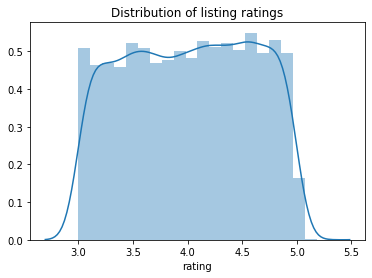

In [ ]:
# Visualize the distribution of the rating column
sns.distplot(airbnb['rating'], bins = 20)
plt.title('Distribution of listing ratings')
plt.show()

In [ ]:
# Find number of unique values in room_type column
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

- **Problem 8**: There are trailing spaces and capitalization issues with `room_type`, we need to fix this problem.

In [ ]:
# How many values of different room_types do we have?
airbnb['room_type'].value_counts()

Entire home/apt         5120
Private room            4487
Shared room              155
Private                   89
   Shared room            71
home                      66
PRIVATE ROOM              31
Name: room_type, dtype: int64

## **Our to do list:**

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

<br>

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

<br>

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values

<br>

_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns.

<br>

_Is that all though?_

- We need to investigate if we have duplicates in our data
- We need to make sure that data makes sense by applying some sanity checks on our DataFrame